# Олимпиада Твой Проект

Код для решения кейса

#### Описание дадасета Baza_s_po_corr:  
gender – пол 
<br>about_len – длина описания профиля<br>style – стиль написания описания <br>education – уровень образования<br>height – рост <br>age – возраст <br>smoking – отношение к курению <br>alcohol - отношение к алкоголю<br>children – отношение к детям<br>photo_count – кол-во фотографий в профиле<br>emoji – есть ли в описании профиля стикеры и эмодзи<br>
#### Описание дадасета Baza_s_po_big_five:
introv_extrav – Интроверсия - экстраверсия<br>conservat_opennew – Консерватизм - открытость новому<br>restraint_emotionality – Сдержанность - эмоциональность<br>straightforwardness_benevolence – Прямолинейность - доброжелательность<br>organization_responsibility – Неорганизованность - ответсвенность




In [1]:
import pandas as pd

# Загрузка данных
df_base = pd.read_excel('Baza_s_po_corr.xlsx')
df_big_five = pd.read_excel('Baza_s_po_big_five.xlsx')

# Предварительный осмотр данных
print("🔹 df_base:")
display(df_base.head())
print(df_base.info())

print("\n🔹 df_big_five:")
display(df_big_five.head())
print(df_big_five.info())


🔹 df_base:


,gender,height,education,smoking,alcohol,children,age,about_len,photo_count,style,emoji
0,m,192.0,Среднее,Нейтрально,Нейтрально,"Нет, но хотелось бы",23,100,5,юмор,1
1,m,170.0,Высшее,Нейтрально,Нейтрально,"Нет, но хотелось бы",34,35,6,юмор,0
2,f,160.0,Высшее,Нейтрально,Нейтрально,"Нет, но хотелось бы",38,110,6,серьезный тон,0
3,m,194.0,Среднее,Нейтрально,Нейтрально,Нет,27,130,3,юмор,1
4,f,180.0,Среднее,Нейтрально,Нейтрально,NaN,20,29,6,серьезный тон,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       1051 non-null   object 
 1   height       966 non-null    float64
 2   education    872 non-null    object 
 3   smoking      914 non-null    object 
 4   alcohol      856 non-null    object 
 5   children     766 non-null    object 
 6   age          1051 non-null   int64  
 7   about_len    1051 non-null   int64  
 8   photo_count  1051 non-null   int64  
 9   style        1051 non-null   object 
 10  emoji        1051 non-null   int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 90.4+ KB
None

🔹 df_big_five:


,introv_extrav,conservat_opennew,restraint_emotionality,straightforwardness_benevolence,organization_responsibility
0,1.00,1.000000,0.000000,1.000000,1.00
1,1.00,0.750000,0.333333,0.833333,0.75
2,0.75,0.750000,0.250000,1.000000,1.00
3,0.50,0.666667,0.250000,0.416667,1.00
4,1.00,1.000000,0.250000,1.000000,0.75


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   introv_extrav                    1051 non-null   float64
 1   conservat_opennew                1051 non-null   float64
 2   restraint_emotionality           1051 non-null   float64
 3   straightforwardness_benevolence  1051 non-null   float64
 4   organization_responsibility      1051 non-null   float64
dtypes: float64(5)
memory usage: 41.2 KB
None


Для корретной работы алгоритмов объединяем df_base и df_big_five, чтобы в дальнейшем не возникло проблем с точностью из-за несвязанности данных между собой


In [2]:
# Объединяем df_base и df_big_five в один датафрейм 
df_full = pd.concat([df_base.reset_index(drop=True), df_big_five.reset_index(drop=True)], axis=1)

# Удалим старую strategy, если есть
df_full = df_full.drop(columns=['strategy'], errors='ignore')

print("Форма объединённого датасета:", df_full.shape)

Форма объединённого датасета: (1051, 16)


#### Обработка пропущенных значений
Столбец height — единственный числовой столбец, в котором есть пропуски. Было принято решение заполнить его, чтобы не терять данные и сохранять при этом смысл данных.<br> Почему была выбрана медиана:<br>Медиана отражает центр распределения числового признака. То есть если не известно, какое значение поставить вместо пропущенного — медиана даёт "наиболее вероятный" вариант.<br>Если подставлять среднее или какой-то "особый" маркер вроде -999,
это может создать ненастоящие зависимости, которые модель подхватит как «важные».
А медиана — это значение из реального распределения, и не выделяется на фоне других числовых.<br> Пропуски в категориальных значениях можно заполнить значением «не указано» для сохранения сути.

In [3]:
# 1. Заполним height медианой
df_full['height'] = df_full['height'].fillna(df_full['height'].median())

# 2. Для категориальных признаков заполним «не указано»
fill_value = 'не указано'
for col in ['education', 'smoking', 'alcohol', 'children']:
    df_full[col] = df_full[col].fillna(fill_value)

# Проверим пропуски
print("🔍 Пропуски после обработки:")
print(df_full.isnull().sum())

🔍 Пропуски после обработки:
gender                             0
height                             0
education                          0
smoking                            0
alcohol                            0
children                           0
age                                0
about_len                          0
photo_count                        0
style                              0
emoji                              0
introv_extrav                      0
conservat_opennew                  0
restraint_emotionality             0
straightforwardness_benevolence    0
organization_responsibility        0
dtype: int64


#### Реализация кластеризации
Для этапа кластеризации пользователей по характеристикам профиля был выбран алгоритм KMeans. Данный метод является классическим и хорошо зарекомендовавшим себя инструментом для группировки объектов на основе схожести признаков. <br>
Перед применением метода KMeans был реализован алгоритм кодирования данных One-hot encoding.

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. Категориальные признаки
cat_cols = ['gender', 'education', 'smoking', 'alcohol', 'children', 'style', 'emoji']

# 2. One-hot encoding
df_encoded = pd.get_dummies(df_full, columns=cat_cols, drop_first=False)

# 3. Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded.drop(columns='strategy', errors='ignore'))

# 4. Кластеризация
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 5. Сохраняем метки кластеров в исходный DataFrame
df_full['strategy'] = clusters

# 6. Распределение по кластерам
print("🔹 Распределение по strategy:")
print(df_full['strategy'].value_counts())

# 7. Анализ главных признаков кластеров
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_encoded.drop(columns='strategy', errors='ignore').columns)
top_features_per_cluster = {}

for i in range(4):
    top_features = cluster_centers.loc[i].abs().sort_values(ascending=False).head(5)
    top_features_per_cluster[i] = top_features
    print(f"\n📌 Топ признаков для strategy {i}:")
    print(top_features)

🔹 Распределение по strategy:
strategy
1    523
3    329
2    177
0     22
Name: count, dtype: int64

📌 Топ признаков для strategy 0:
education_Кандидат наук/PHd    6.839059
education_Высшее               1.199381
height                         0.820176
smoking_Положительно           0.556485
gender_f                       0.542777
Name: 0, dtype: float64

📌 Топ признаков для strategy 1:
smoking_Нейтрально         0.833657
alcohol_Нейтрально         0.627318
smoking_Резко негативно    0.513051
alcohol_не указано         0.398589
smoking_не указано         0.370120
Name: 1, dtype: float64

📌 Топ признаков для strategy 2:
alcohol_не указано      1.891700
smoking_не указано      1.693583
alcohol_Нейтрально      1.307210
children_не указано     1.270881
education_не указано    1.215202
Name: 2, dtype: float64

📌 Топ признаков для strategy 3:
smoking_Резко негативно    0.991196
smoking_Нейтрально         0.874768
alcohol_Резко негативно    0.559039
alcohol_Положительно       0.544939
smoking

Визуализация кластеров с PCA (для понимания различий)

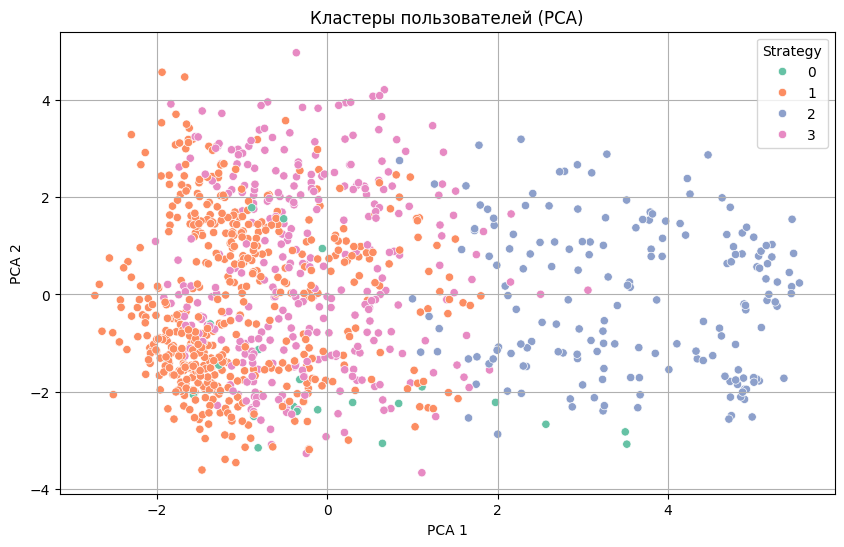

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_full['strategy'], palette='Set2')
plt.title("Кластеры пользователей (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Strategy")
plt.grid(True)
plt.show()


Создаем df_ML_final из уже закодированного df_encoded

In [6]:
# Создаем df_ML_final из уже закодированного df_encoded
df_encoded['strategy'] = df_full['strategy'].values
df_ML_final = df_encoded.copy()

Дополнительные графики для визуализации полученных кластеров и связей их признаков

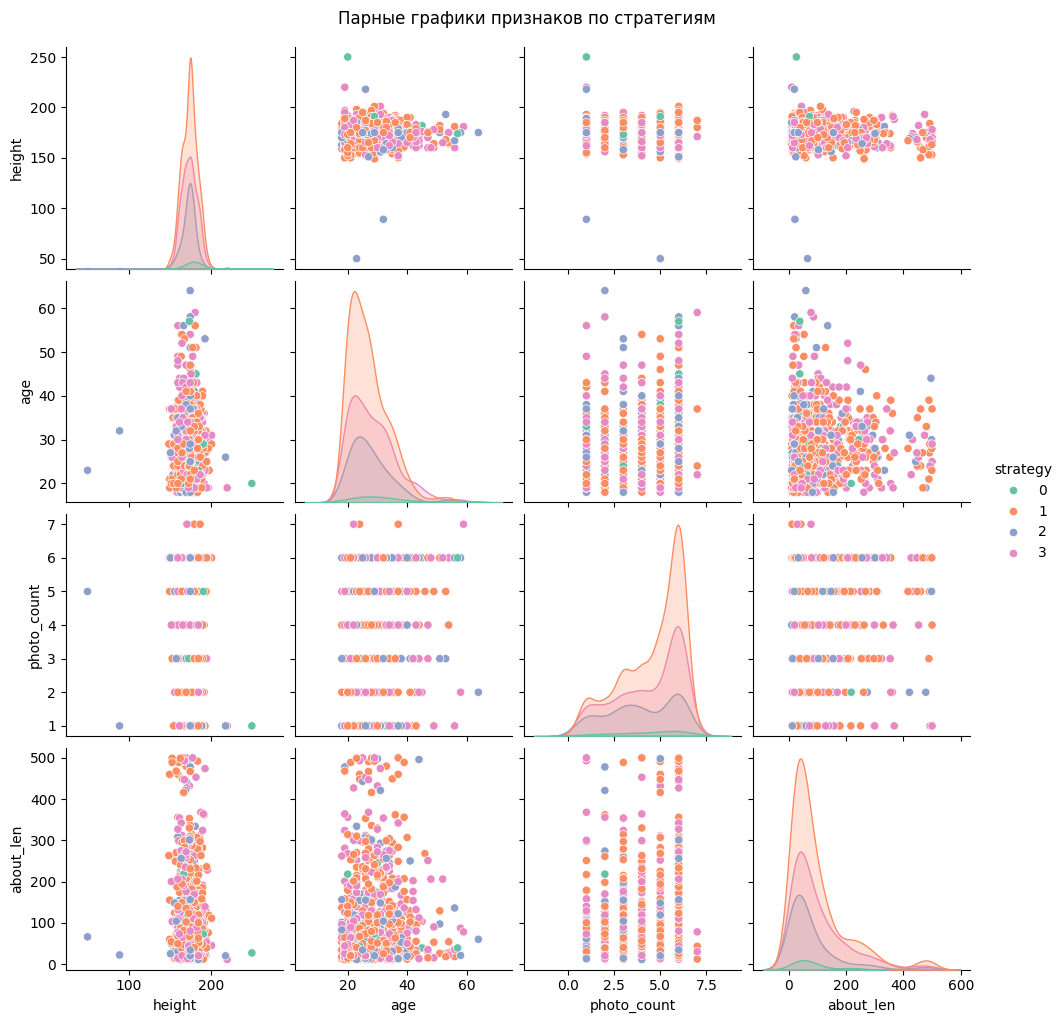

In [7]:
# Выберем несколько признаков + strategy
selected_cols = ['height', 'age', 'photo_count', 'about_len', 'strategy']
df_plot = df_full[selected_cols].copy()

# Pairplot
sns.pairplot(df_plot, hue='strategy', palette='Set2', diag_kind='kde')
plt.suptitle("Парные графики признаков по стратегиям", y=1.02)
plt.show()

Визуализация распределения возраста по стратегиям

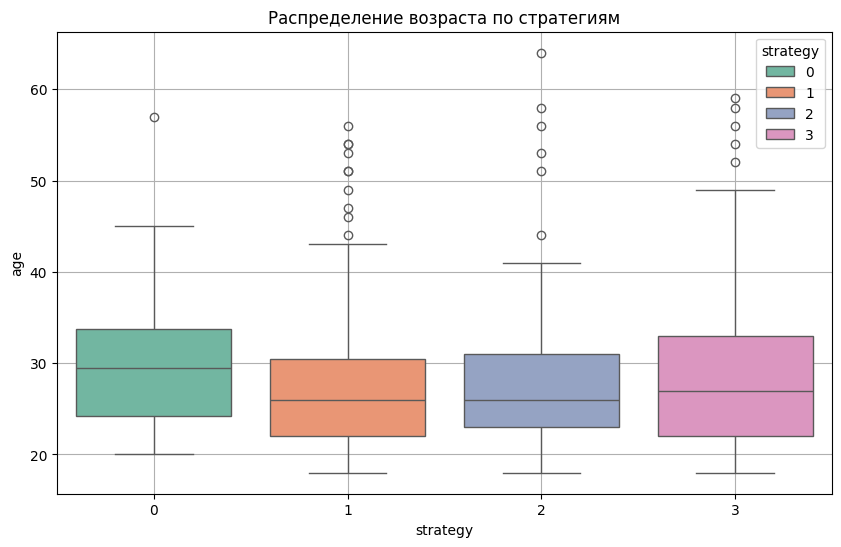

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='strategy', y='age', hue='strategy', data=df_full, palette='Set2')
plt.title("Распределение возраста по стратегиям")
plt.grid(True)
plt.show()

Построение матрицы корреляции признаков

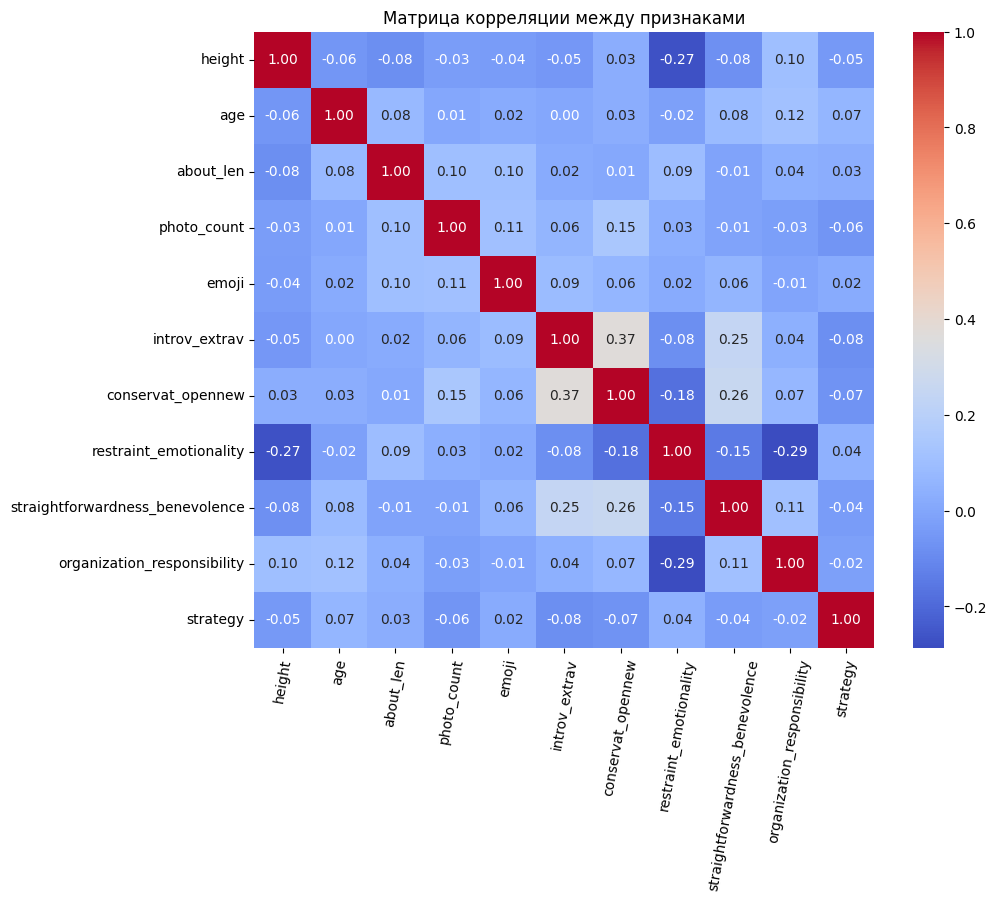

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_full.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Матрица корреляции между признаками")
plt.xticks(rotation=80)  
plt.show()


### CatBoost
Реализуем алгоритм CatBoost. <br> Данный алгоритм был выбран так как он может хорошо обрабатывать датасеты с категориальными признаками.

In [10]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from catboost import CatBoostClassifier

# Категориальные признаки (передаём как есть, без one-hot)
cat_cols = ['gender', 'education', 'smoking', 'alcohol', 'children', 'style', 'emoji']

# Разделяем признаки и целевую переменную
df_full['strategy'] = df_encoded['strategy'].values
X = df_full.drop(columns='strategy')
y = df_full['strategy']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Обучение CatBoost
model = CatBoostClassifier(verbose=0, random_seed=42)

# Указываем, какие признаки категориальные
model.fit(X_train, y_train, cat_features=cat_cols)

# Предсказания и метрики
y_pred = model.predict(X_test)
print("🎯 CatBoost accuracy:", accuracy_score(y_test, y_pred))
print("\nОтчёт по классам (CatBoost):")
print(classification_report(y_test, y_pred, zero_division=0))


🎯 CatBoost accuracy: 0.990521327014218

Отчёт по классам (CatBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.98      0.99       105
           2       1.00      1.00      1.00        36
           3       0.97      1.00      0.99        66

    accuracy                           0.99       211
   macro avg       0.99      1.00      0.99       211
weighted avg       0.99      0.99      0.99       211



### Random Forest
Реализуем алгоритм CatBoost. <br> Был выбран так как является универсальным алгоритмом. Количество деревьев 10

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Те же X и y
X = df_encoded.drop(columns='strategy')
y = df_encoded['strategy']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Random Forest (100 деревьев по умолчанию)
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

# Предсказания
y_pred_rf = rf_model.predict(X_test)

# Метрики
print("🌲 Random Forest accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nОтчёт по классам (Random Forest):")
print(classification_report(y_test, y_pred_rf, zero_division=0))


🌲 Random Forest accuracy: 0.966824644549763

Отчёт по классам (Random Forest):
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.98      0.98      0.98       105
           2       0.97      0.94      0.96        36
           3       0.94      0.98      0.96        66

    accuracy                           0.97       211
   macro avg       0.97      0.85      0.89       211
weighted avg       0.97      0.97      0.97       211



### Проверка на переобучение моделей.
Проверка проводилась методом Кросс-валидации.

In [12]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from catboost import CatBoostClassifier

# Модель
model = CatBoostClassifier(verbose=0, random_seed=42)

# Кросс-валидация
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# Результаты
print("📊 Accuracy по фолдам:", scores)
print("🎯 Средняя accuracy:", scores.mean())


📊 Accuracy по фолдам: [0.99526066 0.99047619 1.         1.         0.98095238]
🎯 Средняя accuracy: 0.9933378469871361


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Модель
rf_model = RandomForestClassifier(random_state=42)

# Кросс-валидация
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=cv, scoring='accuracy')

# Результаты
print("🌲 Accuracy по фолдам (Random Forest):", rf_scores)
print("🎯 Средняя accuracy:", rf_scores.mean())


🌲 Accuracy по фолдам (Random Forest): [0.97630332 0.97142857 0.99047619 0.97142857 0.97619048]
🎯 Средняя accuracy: 0.977165425411871


In [14]:
### The end! (^・ω・^ )~~~~~~